In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import imageio
import numpy as np
from scipy import stats

In [2]:
m0 = 5
m = 3
n = 250

G = nx.complete_graph(m0)
images = []
pos = nx.spring_layout(G)

for t in range(n - m0):
    new_node = m0 + t
    G.add_node(new_node)
    degrees = dict(G.degree())
    targets = set()
    while len(targets) < m:
        targets.add(random.choices(
            list(degrees.keys()), 
            weights=list(degrees.values())
        )[0])
    G.add_edges_from((new_node, target) for target in targets)
    
    pos[new_node] = np.random.rand(2) * 5
    pos = nx.spring_layout(G, pos=pos, fixed=list(pos.keys()))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=500, font_size=10, ax=ax1)
    ax1.set_title(f'Step {t+1}: Added node {new_node}')
    
    degree_vals = list(dict(G.degree()).values())
    ax2.hist(degree_vals, bins=range(min(degree_vals), max(degree_vals)+2), alpha=0.7, density=True)
    ax2.set_title('Degree Distribution')
    ax2.set_xlabel('Degree')
    ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    
    fig.canvas.draw()
    image = np.array(fig.canvas.renderer.buffer_rgba())
    images.append(image)
    plt.close()

imageio.mimsave('graph_evolution.gif', images, duration=0.5)

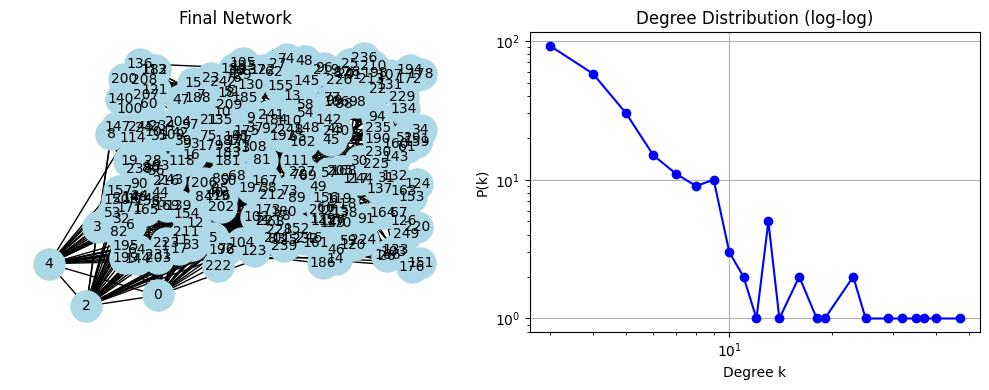

Power-law exponent α = 1.687
Theoritical Power-law exponent α = 3.153
R-squared = 0.806
Standard error = 0.180
Estimated xmin = 3


In [7]:
degrees = list(dict(G.degree()).values())
degree_counts = np.bincount(degrees)
k_values = np.arange(len(degree_counts))
nonzero_mask = degree_counts > 0

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title('Final Network')

plt.subplot(1, 2, 2)
plt.loglog(k_values[nonzero_mask], degree_counts[nonzero_mask], 'bo-')
plt.xlabel('Degree k')
plt.ylabel('P(k)')
plt.title('Degree Distribution (log-log)')
plt.grid(True)

plt.tight_layout()
plt.show()

log_k = np.log(k_values[nonzero_mask])
log_p = np.log(degree_counts[nonzero_mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(log_k, log_p)

xmin = k_values[nonzero_mask][0]

tail = np.array(degrees)
tail = tail[tail >= xmin]

n = len(tail)
alpha_theory = 1 + n / np.sum(np.log(tail / xmin))

alpha = -slope
print(f"Power-law exponent α = {alpha:.3f}")
print(f"Theoritical Power-law exponent α = {alpha_theory:.3f}")
print(f"R-squared = {r_value**2:.3f}")
print(f"Standard error = {std_err:.3f}")

xmin = k_values[nonzero_mask][0]
print(f"Estimated xmin = {xmin}")

In [9]:
print(2 * (n - 1) / (n * (n - 2)) * t, 2 / n * t)

1.9598709677419355 1.952


# 6.1

![alt text](6_1.png "Title")

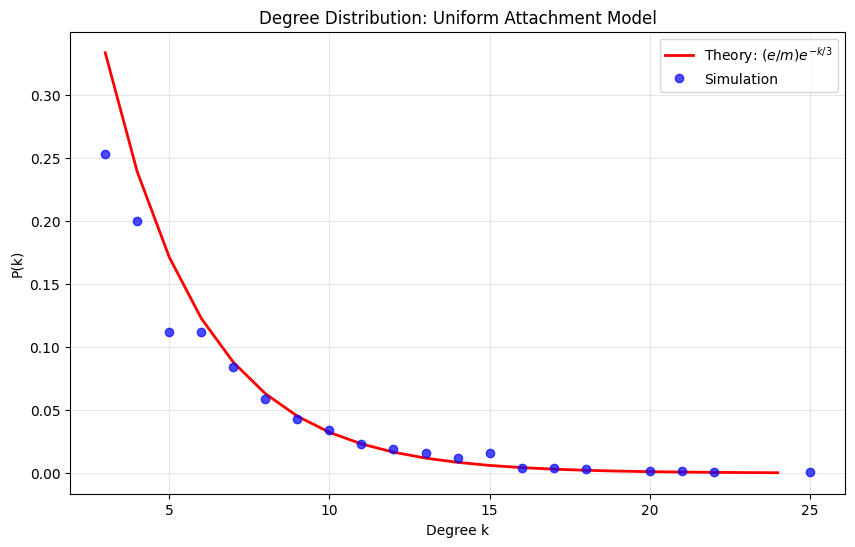

In [13]:
m0 = 5
m = 3
n = 1000

G = nx.complete_graph(m0)

for t in range(n - m0):
    new_node = m0 + t
    G.add_node(new_node)
    
    targets = set()
    while len(targets) < m:
        targets.add(random.choice(list(G.nodes())))
    
    G.add_edges_from((new_node, target) for target in targets)

degrees = [d for n, d in G.degree()]
k_values = np.unique(degrees)
Pk_sim = [np.sum(degrees == k)/len(degrees) for k in k_values]

k_range = np.arange(min(degrees), max(degrees))
Pk_theory = (np.e/m) * np.exp(-k_range/m)

plt.figure(figsize=(10, 6))
plt.plot(k_range, Pk_theory, 'r-', linewidth=2, label=f'Theory: $(e/m)e^{{-k/{m}}}$')
plt.plot(k_values, Pk_sim, 'bo', alpha=0.7, label='Simulation')
# plt.yscale('log')
plt.xlabel('Degree k')
plt.ylabel('P(k)')
plt.title('Degree Distribution: Uniform Attachment Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()